In [19]:
import uproot
import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import mplhep
from mpl_toolkits import mplot3d
import itertools
import awkward as ak
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
from matplotlib import colormaps

mplhep.style.use(["LHCbTex2"])
plt.rcParams["savefig.dpi"] = 600
%matplotlib inline

In [20]:
file = uproot.open(
    "/work/cetin/LHCb/reco_tuner/data_matching/resolutions_and_effs_B_default_thesis.root:Track/MatchTrackChecker_8319528f/Match;1",
)

P_recoed = file["07_long_electrons_P_reconstructed;1"].to_numpy()
P_recoable = file["07_long_electrons_P_reconstructible;1"].to_numpy()

Pt_recoed = file["07_long_electrons_Pt_reconstructed;1"].to_numpy()
Pt_recoable = file["07_long_electrons_Pt_reconstructible;1"].to_numpy()

In [21]:
P_Velo_recoed = file["07_long_electrons_EndVelo_P_reconstructed;1"].to_numpy()
P_Velo_recoable = file[
    "07_long_electrons_EndVelo_P_reconstructible;1"].to_numpy()

print("control eff: ", np.sum(P_recoed[0]) / np.sum(P_recoable[0]))
print("new eff: ", np.sum(P_Velo_recoed[0]) / np.sum(P_Velo_recoable[0]))

Pt_Velo_recoed = file["07_long_electrons_EndVelo_Pt_reconstructed;1"].to_numpy(
)
Pt_Velo_recoable = file[
    "07_long_electrons_EndVelo_Pt_reconstructible;1"].to_numpy()

print("control eff: ", np.sum(Pt_recoed[0]) / np.sum(Pt_recoable[0]))
print("new eff: ", np.sum(Pt_Velo_recoed[0]) / np.sum(Pt_Velo_recoable[0]))

print(np.sum(P_recoable[0], dtype=int))
print(np.sum(P_recoed[0]))
print(np.sum(P_Velo_recoable[0]))
print(np.sum(P_Velo_recoed[0]))

control eff:  0.6145546589237905
new eff:  0.6155293168395326
control eff:  0.6173168233870217
new eff:  0.6176270902698983
212152
130379.0
213171.0
131213.0


In [22]:
PdP_Velo_recoed = file["07_long_electrons_EndVelo_PdP_reconstructed;1"].to_numpy()
PdP_Velo_recoable = file["07_long_electrons_EndVelo_PdP_reconstructible;1"].to_numpy()

PdP_Velo_recoable

(array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.1620e+03, 2.4200e+02, 8.7000e+01, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.3471e+04, 2.7160e+03, 1.4720e+03, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.3000e+01, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        [1.3000e+01, 1.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [9.0000e+00, 3.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]]),
 array([     0.,   1000.,   2000.,   3000.,   4000.,   5000.,   6000.,
          7000.,   8000.,   9000.,  10000.,  11000.,  12000.,  13000.,
         14000.,  15000.,  16000.,  17000.,  18000.,  19000.,  20000.,
         21000.,  22000.,  23000.,  24000.,  25000.,  26000.,  27000.,
         28000.,  29000.,  30000.,  31000.,  32000.,  33000.,  34000.,
         35000.,  36000.,  37000.,  38000.,  39000.,  

In [23]:
effs = np.divide(PdP_Velo_recoed[0], PdP_Velo_recoable[0])

df = pd.DataFrame(effs)
df

/tmp/ipykernel_733517/2776815717.py:1: RuntimeWarning: invalid value encountered in divide
  effs = np.divide(PdP_Velo_recoed[0], PdP_Velo_recoable[0])


0         1         2         3         4         5         6   \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   0.297453  0.351240  0.298851  0.466667  0.312500  0.000000  0.000000   
2   0.377146  0.362297  0.348505  0.342369  0.369942  0.291339  0.326471   
3   0.532556  0.543753  0.547119  0.547350  0.505400  0.514877  0.485997   
4   0.595858  0.616777  0.618738  0.601467  0.636095  0.606115  0.554913   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.666667  1.000000  1.000000  1.000000  1.000000       NaN       NaN   
96  1.000000       NaN  1.000000       NaN  1.000000       NaN       NaN   
97  0.923077       NaN       NaN  1.000000  1.000000       NaN  0.000000   
98  0.846154  1.000000  1.000000       NaN       NaN  1.000000  1.000000   
99  0.777778  0.666667  1.000000  1.000000  1.000000  1.000000  1.000000   

          7         8         9   ...  90  91   92  93   94  95  96  97   98  \
0        NaN       NaN       NaN  ... NaN NaN  NaN NaN  NaN NaN NaN NaN  NaN   
1        NaN       NaN       NaN  ... NaN NaN  NaN NaN  NaN NaN NaN NaN  NaN   
2   0.328205  0.208333  0.237500  ... NaN NaN  NaN NaN  NaN NaN NaN NaN  NaN   
3   0.444846  0.426966  0.346939  ... NaN NaN  NaN NaN  NaN NaN NaN NaN  NaN   
4   0.496689  0.591224  0.518625  ... NaN NaN  NaN NaN  NaN NaN NaN NaN  NaN   
..       ...       ...       ...  ...  ..  ..  ...  ..  ...  ..  ..  ..  ...   
95       NaN  1.000000  1.000000  ... NaN NaN  NaN NaN  NaN NaN NaN NaN  NaN   
96       NaN       NaN       NaN  ... NaN NaN  NaN NaN  1.0 NaN NaN NaN  NaN   
97  1.000000  1.000000  0.000000  ... NaN NaN  NaN NaN  NaN NaN NaN NaN  1.0   
98       NaN  1.000000  1.000000  ... NaN NaN  NaN NaN  NaN NaN NaN NaN  NaN   
99       NaN  1.000000  1.000000  ... NaN NaN  1.0 NaN  NaN NaN NaN NaN  NaN   

    99  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  
..  ..  
95 NaN  
96 NaN  
97 NaN  
98 NaN  
99 NaN  

[100 rows x 100 columns]

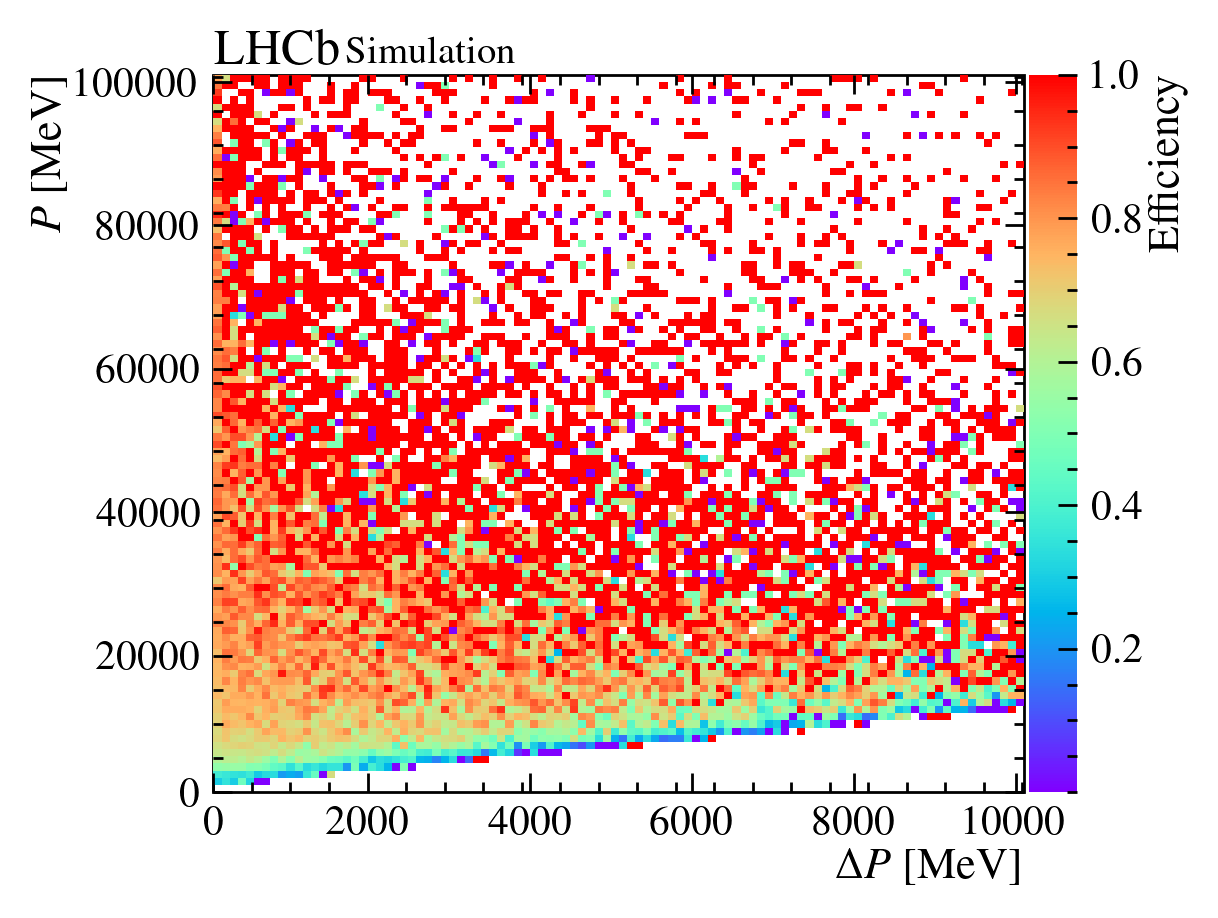

In [26]:
# fig = plt.figure(figsize=(15, 7))
ax = sns.heatmap(
    effs,
    robust=True,
    square=False,
    cmap=colormaps["rainbow"],
    xticklabels=False,
    yticklabels=False,
    vmax=1,
    cbar_kws={
        "label": "Efficiency",
        "pad": 0.005,
        "shrink": 1,
        "ticks": [0.2, 0.4, 0.6, 0.8, 1.0],
        "aspect": 15,
    },
)
ax.set_ylabel(f"$P$ [MeV]")
ax.set_xlabel(f"$\Delta P$ [MeV]")
ax.patch.set_edgecolor("black")

ax.set_yticks([0, 19, 39, 59, 79, 99], [0, 20000, 40000, 60000, 80000, 100000])
ax.set_xticks([0, 19, 39, 59, 79, 99], [0, 2000, 4000, 6000, 8000, 10000])
ax.invert_yaxis()
# ax.set_ylim(0, 59)
# ax.set_xlim(0, 59)

ax.patch.set_linewidth(2)
# ax.set_yticklabels([])
# ax.set_title("EndVELO to EndUT $x/X_0$", size=35)
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/Efficiency_PdP_Velo_hist2d.pdf",
#     format="PDF")

In [58]:
dP_Velo_recoed = file["07_long_electrons_EndVelo_dP_reconstructed;1"].to_numpy()
dP_Velo_recoable = file["07_long_electrons_EndVelo_dP_reconstructible;1"].to_numpy()

dP_Velo_recoed

(array([6.4927e+04, 8.7210e+03, 5.4020e+03, 4.0560e+03, 3.3500e+03,
        2.8240e+03, 2.3990e+03, 2.0600e+03, 1.8280e+03, 1.5610e+03,
        1.5130e+03, 1.3480e+03, 1.2090e+03, 1.1250e+03, 1.0270e+03,
        9.3000e+02, 9.0200e+02, 8.2300e+02, 7.8100e+02, 6.7500e+02,
        6.8700e+02, 6.5400e+02, 6.6000e+02, 6.2300e+02, 5.3100e+02,
        5.1900e+02, 5.1200e+02, 4.4000e+02, 4.7200e+02, 4.6700e+02,
        4.1100e+02, 4.1300e+02, 3.7700e+02, 3.4600e+02, 3.5400e+02,
        3.3100e+02, 3.3400e+02, 2.8600e+02, 3.0600e+02, 2.8800e+02,
        2.7000e+02, 2.8100e+02, 2.5100e+02, 2.2500e+02, 2.7100e+02,
        2.3000e+02, 2.4100e+02, 2.1700e+02, 2.2900e+02, 2.0700e+02,
        2.2500e+02, 1.8500e+02, 1.9000e+02, 1.8600e+02, 1.9100e+02,
        1.9900e+02, 1.8400e+02, 1.8500e+02, 1.7200e+02, 1.5700e+02,
        1.5300e+02, 1.7100e+02, 1.3700e+02, 1.5200e+02, 1.4500e+02,
        1.4600e+02, 1.2900e+02, 1.3900e+02, 1.4300e+02, 1.3700e+02,
        1.1600e+02, 1.2200e+02, 1.2600e+02, 1.19

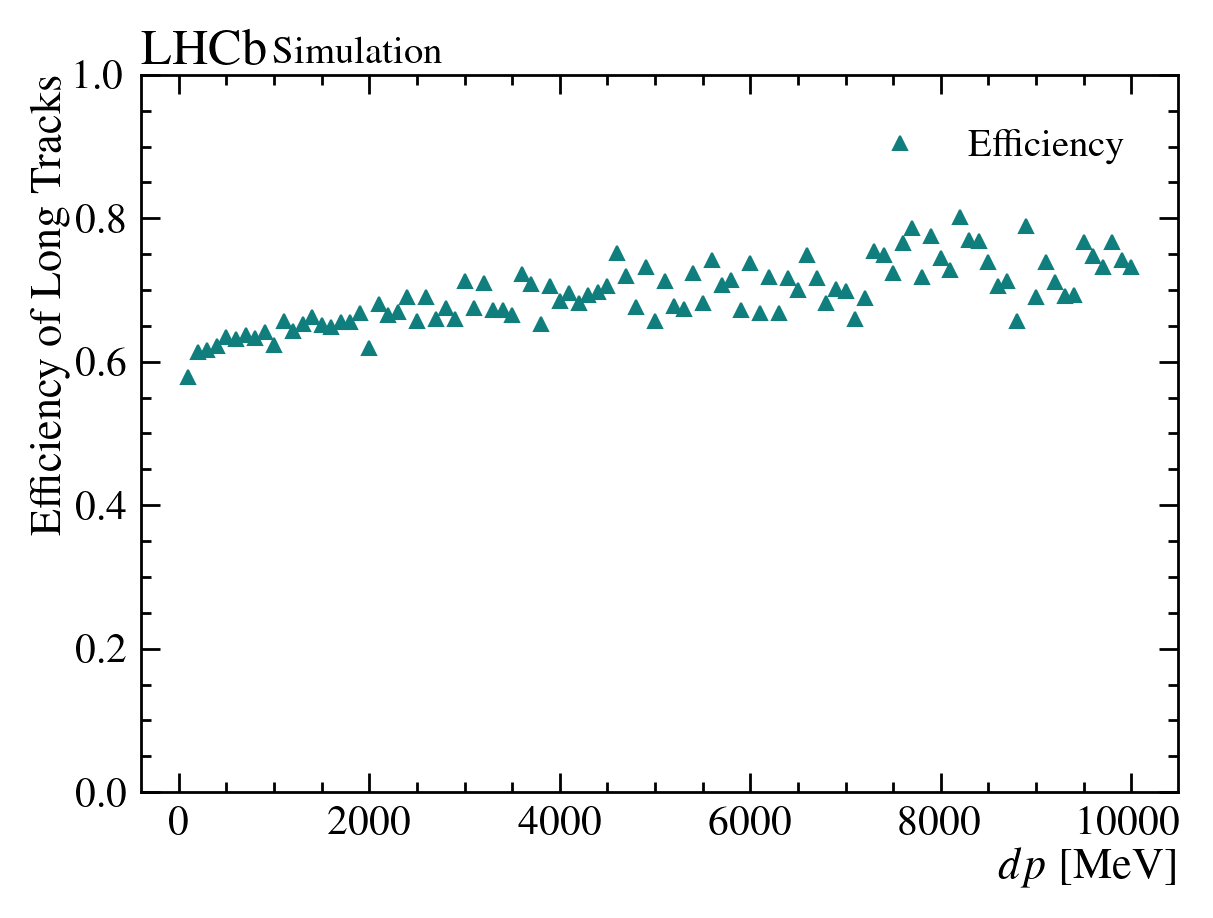

In [57]:
fig = plt.figure()
# plt.bar(
#     dP_Velo_recoable[1][1:],
#     dP_Velo_recoable[0] / np.max(dP_Velo_recoable[0]),
#     alpha=0.5,
#     color="#107E7D",
#     label="p distribution, e",
# )
plt.errorbar(
    dP_Velo_recoable[1][1:],
    dP_Velo_recoed[0] / dP_Velo_recoable[0],
    color="#107E7D",
    label="Efficiency",
    fmt="^",
    ms=10,
)
plt.ylim(0, 1)
plt.xlabel(r"$dp$ [MeV]")
plt.ylabel("Efficiency of Long Tracks")
plt.legend(loc="best")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig("/work/cetin/Projektpraktikum/thesis/Efficiency_dP_Velo.pdf",
#             format="PDF")